# EDA Assignment


## Dataset Information :
<ul style= "color:#137667;
            font-size:12px;">
    <li> age : age of the patient</li>
    <li> sex : sex of the patient (0 - Male, 1 - Female)</li>
    <li> cp : Chest Pain type</li>
    0: typical angina <br>
    1: atypical angina <br>
    2: non-anginal pain <br>
    3: asymptomatic <br>
    <li> trtbps : resting blood pressure (in mm Hg)</li>
    <li> fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li> chol : cholestoral in mg/dl fetched via BMI sensor</li>
    <li> rest_ecg : resting electrocardiographic results</li>
  0:normal <br>
  1:having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of>0.05 mV) <br>
  2:showing probable or definite left ventricular hypertrophy by Estes' criteria
    <li> thalachh : maximum heart rate achieved</li>
    <li> exng : exercise induced angina (1 = yes; 0 = no)</li>
    <li> oldpeak : Previous peak</li>
    <li> slp : ST/HR Slope </li>
    <li> caa : number of major vessels (0-4)</li>
    <li> thall : Thal rate</li>
    <li> output : 0= less chance of heart attack 1= more chance of heart attack</li>
</ul>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# load the data to colab
data = pd.read_csv('https://new-assets.ccbp.in/frontend/content/aiml/math-for-ml/heart_cleaned_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    float64
 8   exng      302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.2 KB


---
---
**1. Check does patients with exercise-induced angina (exng) at higher risk of heart attack, sort by exng ascending and round to 2 decimals.**

Print with `Heart attack risk by exercise-induced angina (exng):`

In [ ]:
risk_by_exng = data.groupby('exng')['output'].mean().sort_index().round(2)
print("Heart attack risk by exercise-induced angina (exng):\n", risk_by_exng)

Heart attack risk by exercise-induced angina (exng):
 exng
0.0    0.70
1.0    0.22
Name: output, dtype: float64


---
---
**2. Which thalassemia (thall) category is associated with the highest risk of heart attack, sort in descending order, and round the results to 2 decimals.**

Print with `Heart attack risk by thalassemia (thall):`

In [ ]:
risk_by_thall = data.groupby('thall')['output'].mean().sort_values(ascending=False).round(2)
print("Heart attack risk by thalassemia (thall):\n", risk_by_thall)

Heart attack risk by thalassemia (thall):
 thall
2    0.78
0    0.50
1    0.33
3    0.24
Name: output, dtype: float64


---
---
**3.Determine mean, standard deviation and quartiles(Q1,median,Q3) for following columns: age, trtbps, chol, thalachh, round the results to 0 decimals.**

In [ ]:
cols = ['age', 'trtbps', 'chol', 'thalachh']
desc = data[cols].describe(percentiles=[0.25, 0.5, 0.75]).round()

stats_df = desc.loc[['mean', 'std', '25%', '50%', '75%']].rename(
    index={'25%': 'Q1', '50%': 'Median', '75%': 'Q3'}
)

print(stats_df)

         age  trtbps   chol  thalachh
mean    54.0   132.0  246.0     150.0
std      9.0    18.0   51.0      23.0
Q1      48.0   120.0  212.0     134.0
Median  56.0   130.0  242.0     152.0
Q3      61.0   140.0  274.0     166.0


---
---
**4.Analyse whether males or females are at a higher risk of heart attack?**

Print with `Heart attack risk by sex (0=Male, 1=Female):`

In [ ]:
sex_and_output = data[['sex', 'output']]

grouped = sex_and_output.groupby('sex')

mean_output_by_sex = grouped['output'].mean()

risk_by_sex = mean_output_by_sex

print("Heart attack risk by sex (0=Male, 1=Female):\n", risk_by_sex)

Heart attack risk by sex (0=Male, 1=Female):
 sex
0    0.750000
1    0.446602
Name: output, dtype: float64


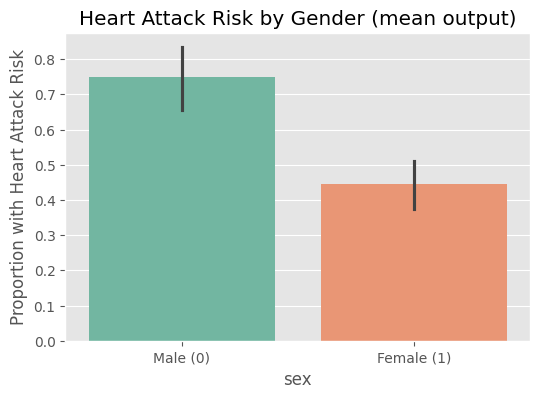

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='output', data=data, palette="Set2")
plt.xticks([0,1], ['Male (0)','Female (1)'])
plt.title("Heart Attack Risk by Gender (mean output)")
plt.ylabel("Proportion with Heart Attack Risk")
plt.show()

**5.Patients with which type of chest pain are at highest risk of heart attack?**

Print with `Heart attack risk by chest pain type:`

In [ ]:
risk_by_cp = data.groupby('cp')['output'].mean()
print("Heart attack risk by chest pain type:\n", risk_by_cp)

Heart attack risk by chest pain type:
 cp
0    0.272727
1    0.820000
2    0.790698
3    0.695652
Name: output, dtype: float64


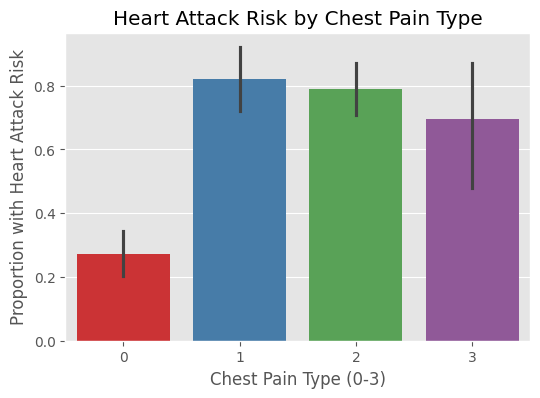

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='cp', y='output', data=data, palette="Set1")
plt.title("Heart Attack Risk by Chest Pain Type")
plt.ylabel("Proportion with Heart Attack Risk")
plt.xlabel("Chest Pain Type (0-3)")
plt.show()

---
---
**6.Analyse the effect of age on heart attack risk?**

In [ ]:
age_risk = data.groupby('output')['age'].mean()
print(age_risk)

output
0    56.601449
1    52.585366
Name: age, dtype: float64


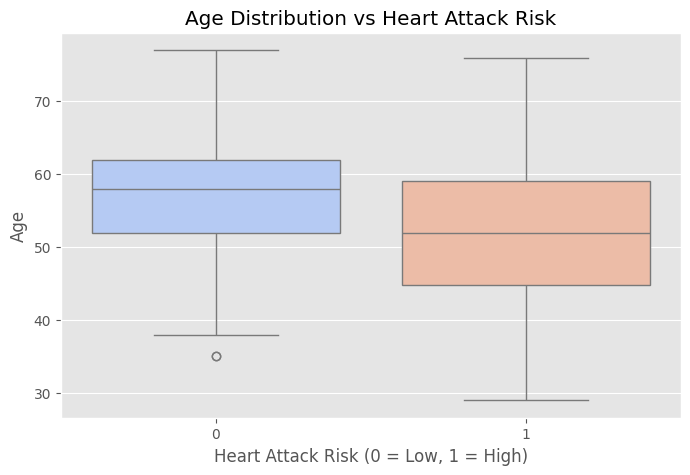

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='output', y='age', data=data, palette="coolwarm")
plt.title("Age Distribution vs Heart Attack Risk")
plt.xlabel("Heart Attack Risk (0 = Low, 1 = High)")
plt.ylabel("Age")
plt.show()

---
---
**7. Does higher risk of `Heart attack risk by fasting blood sugar:` is associated more with low fasting blood sugar levels or high fasting blood sugar levels?**

In [ ]:
risk_by_fbs = data.groupby('fbs')['output'].mean().sort_index()
print("Heart attack risk by fasting blood sugar:\n", risk_by_fbs)

Heart attack risk by fasting blood sugar:
 fbs
0    0.548638
1    0.511111
Name: output, dtype: float64


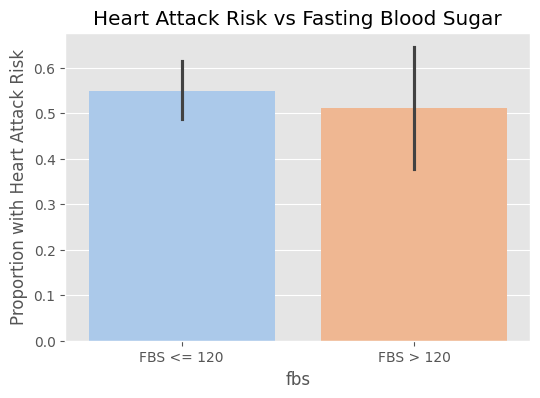

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='fbs', y='output', data=data, palette="pastel")
plt.xticks([0,1], ['FBS <= 120','FBS > 120'])
plt.title("Heart Attack Risk vs Fasting Blood Sugar")
plt.ylabel("Proportion with Heart Attack Risk")
plt.show()

---
---
**8. How the risk of `Heart attack risk by resting ECG results:`determined from resting electrocardiographic results?**

In [ ]:
risk_by_ecg = data.groupby('restecg')['output'].mean().sort_index()
print("Heart attack risk by resting ECG results:\n", risk_by_ecg)

Heart attack risk by resting ECG results:
 restecg
0    0.462585
1    0.629139
2    0.250000
Name: output, dtype: float64


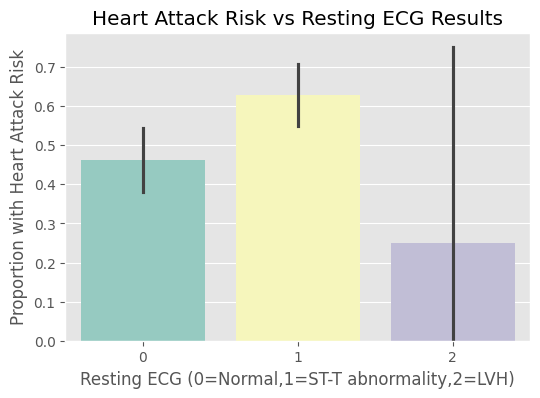

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='restecg', y='output', data=data, palette="Set3")
plt.title("Heart Attack Risk vs Resting ECG Results")
plt.ylabel("Proportion with Heart Attack Risk")
plt.xlabel("Resting ECG (0=Normal,1=ST-T abnormality,2=LVH)")
plt.show()

---
---
**9. Is resting blood presure a significant factor for determining risk of a heart attack?**


Print with `Mean blood pressure by risk:`

In [ ]:
print("Mean blood pressure by risk:")
print(data.groupby('output')['trtbps'].mean())

Mean blood pressure by risk:
output
0    134.398551
1    129.250000
Name: trtbps, dtype: float64


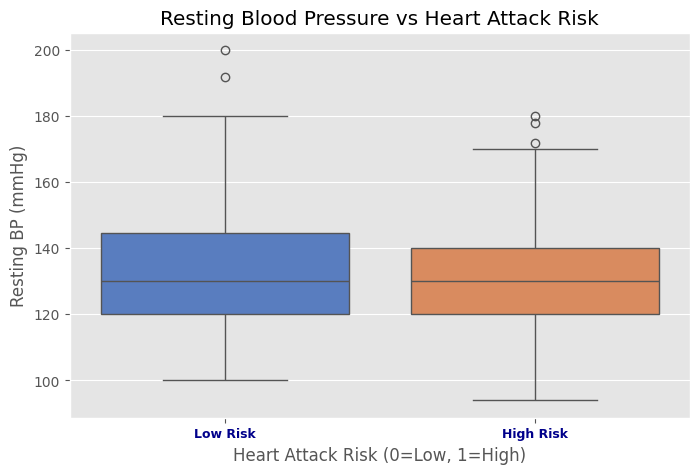

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(x='output', y='trtbps', data=data, palette="muted")
plt.title("Resting Blood Pressure vs Heart Attack Risk")
plt.xlabel("Heart Attack Risk (0=Low, 1=High)")
plt.ylabel("Resting BP (mmHg)")

ax.set_xticks([0, 1])
ax.set_xticklabels(['Low Risk', 'High Risk'], color='darkblue', fontsize=9, fontweight='bold')

plt.show()


---
---
**10. Is heart attack risk asociated with a higher heart rate?**

In [ ]:
print("Mean heart rate by risk:")
print(data.groupby('output')['thalachh'].mean())

Mean heart rate by risk:
output
0    139.101449
1    158.336512
Name: thalachh, dtype: float64


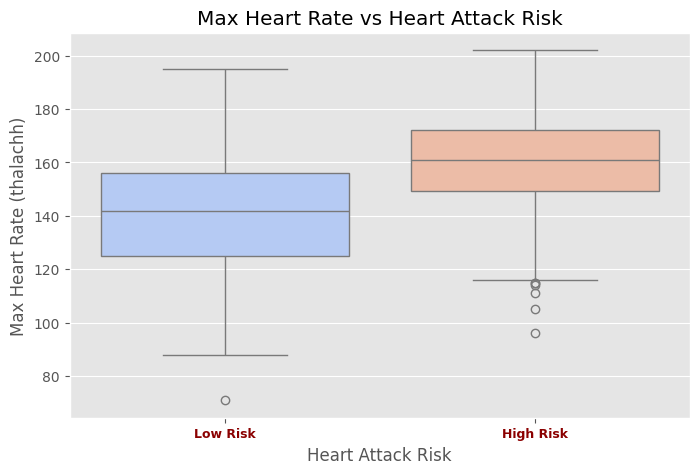

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(x='output', y='thalachh', data=data, palette="coolwarm")
plt.title("Max Heart Rate vs Heart Attack Risk")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Max Heart Rate (thalachh)")


ax.set_xticks([0, 1])
ax.set_xticklabels(['Low Risk', 'High Risk'], color='darkred', fontsize=9, fontweight='bold')

plt.show()

---
---
**11. Determine which ST/HR(ST segment and Heart rate ratio) slope value is associated with the highest risk of heart attack?**

In [ ]:
risk_by_slp = data.groupby('slp')['output'].mean()
print("Heart attack risk by ST/HR slope:\n", risk_by_slp)

Heart attack risk by ST/HR slope:
 slp
0    0.428571
1    0.350000
2    0.751773
Name: output, dtype: float64


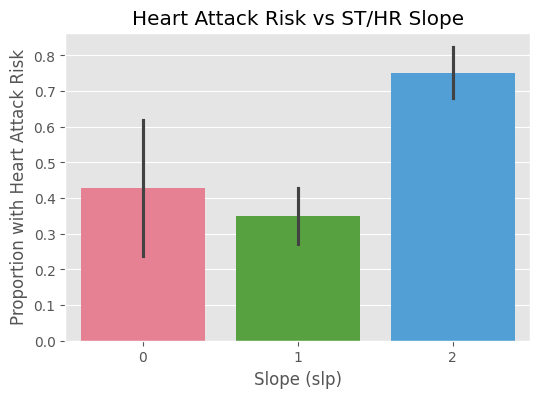

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='slp', y='output', data=data, palette="husl")
plt.title("Heart Attack Risk vs ST/HR Slope")
plt.xlabel("Slope (slp)")
plt.ylabel("Proportion with Heart Attack Risk")
plt.show()